In [1]:
# import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# load the dataset
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
sns.reset_defaults()

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# data shape
df.shape

(200, 5)

In [7]:
# brief summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# statistical summary of the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# check for nulls
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
# check for duplicate records
df.duplicated().sum()

0

In [11]:
# dropping unnecessary column
df.drop(columns='CustomerID',inplace=True)

# Univariate Analysis and visualisations of the columns:

In [12]:
import warnings
warnings.filterwarnings('ignore')

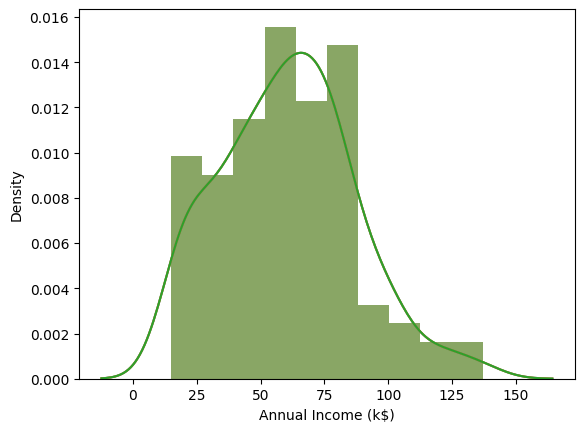

In [15]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

In [16]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

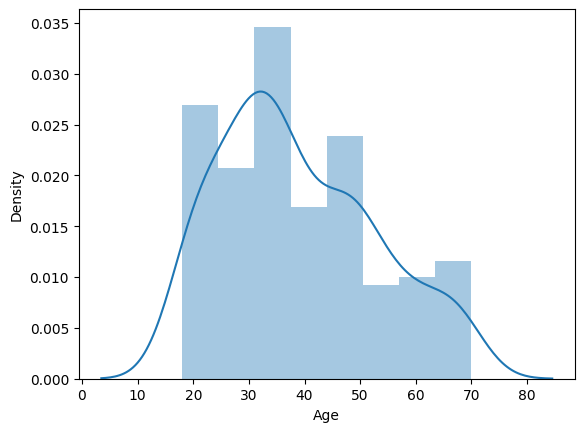

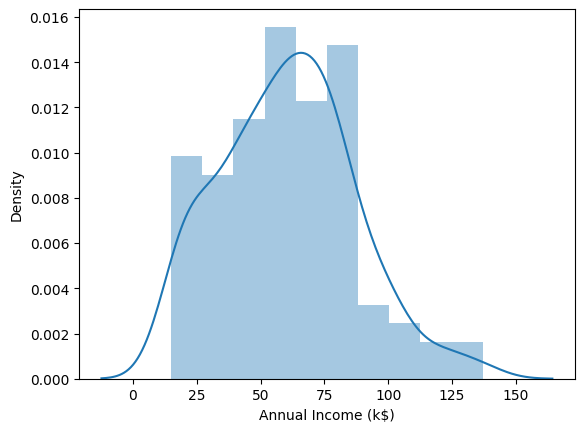

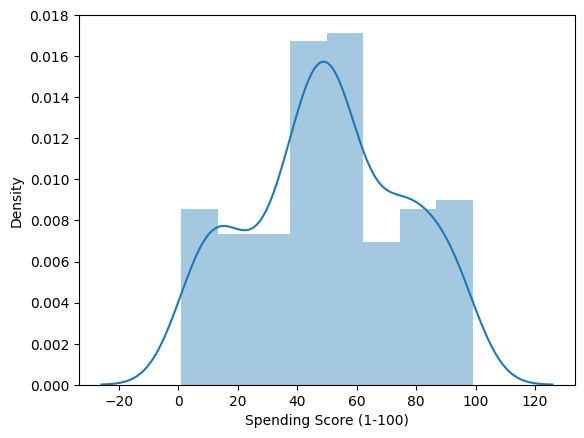

In [17]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

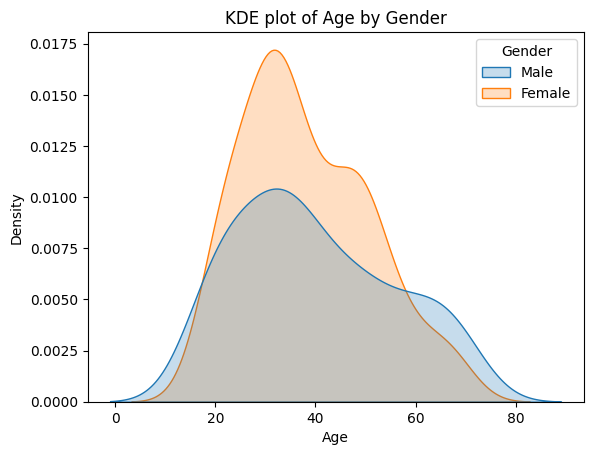

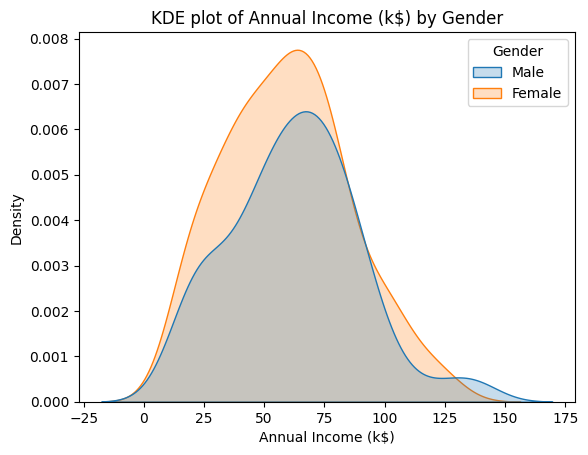

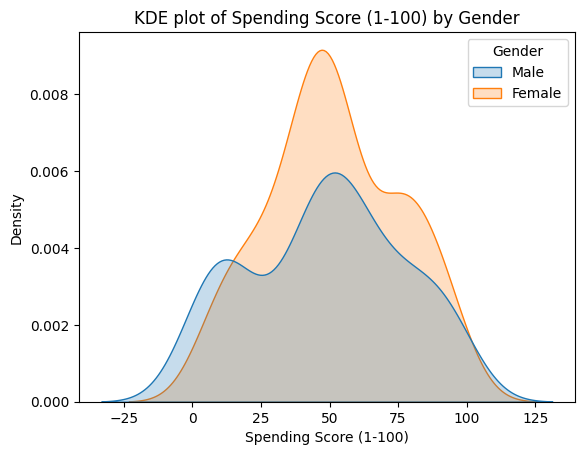

In [18]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i,shade=True,hue='Gender')
    plt.title(f'KDE plot of {i} by Gender')
    plt.show()

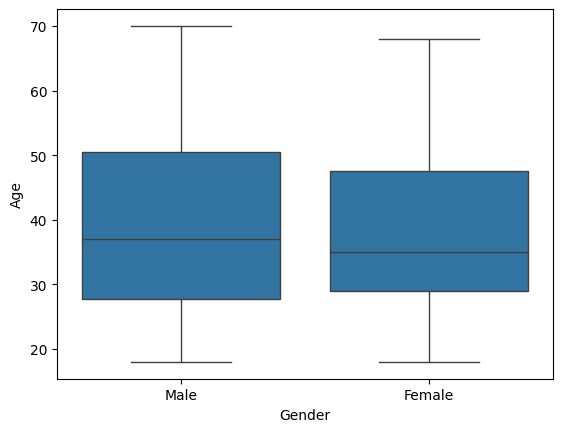

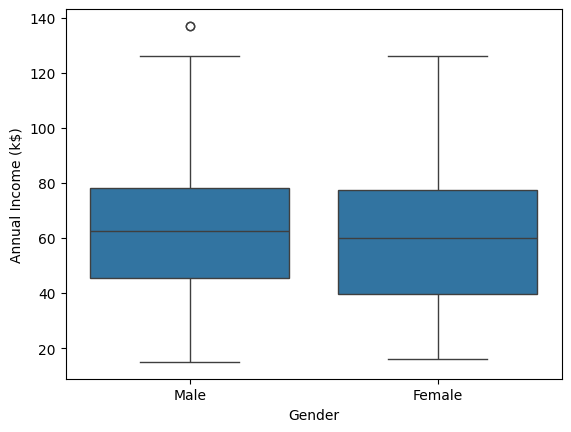

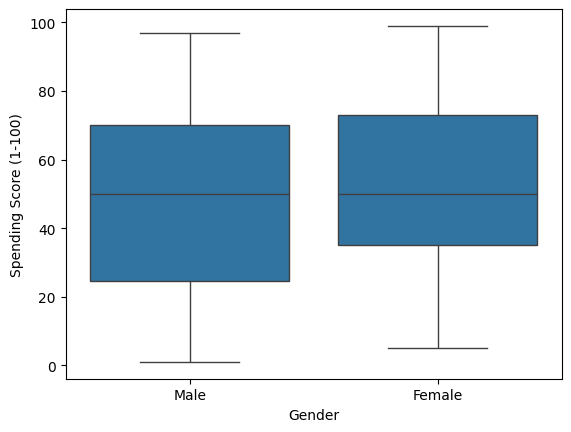

In [19]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])
    plt.show()

# Bivariate Analysis:

In [20]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

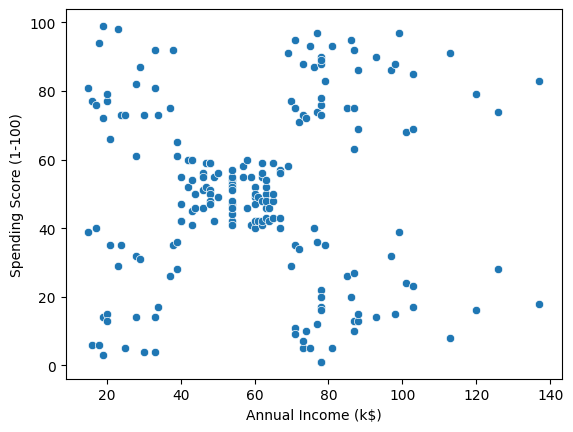

In [21]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

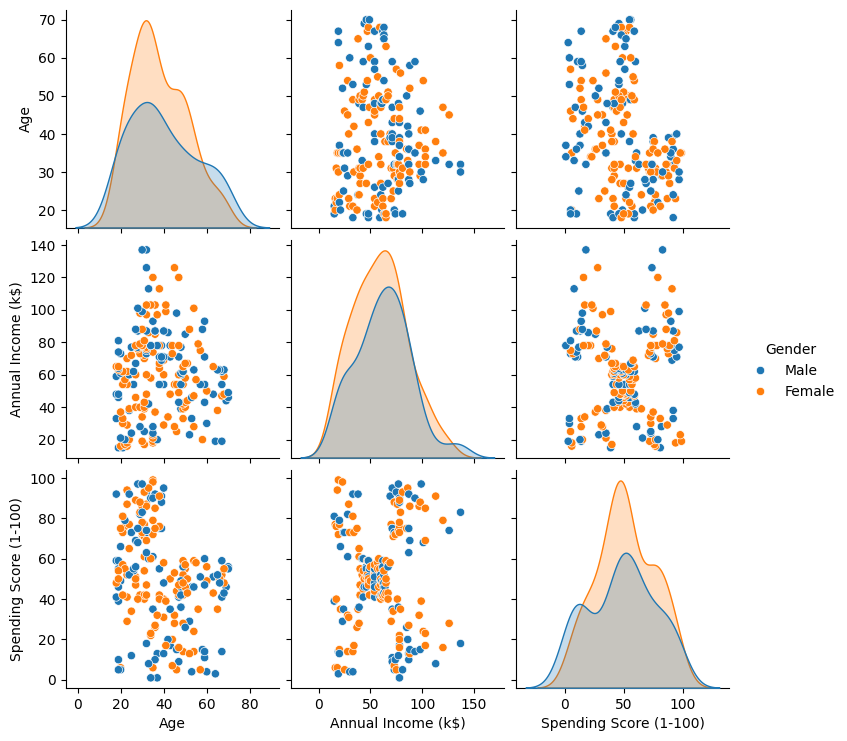

In [22]:
sns.pairplot(df,hue='Gender')
plt.show()

In [23]:
grouped_mean = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
grouped_mean

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [24]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


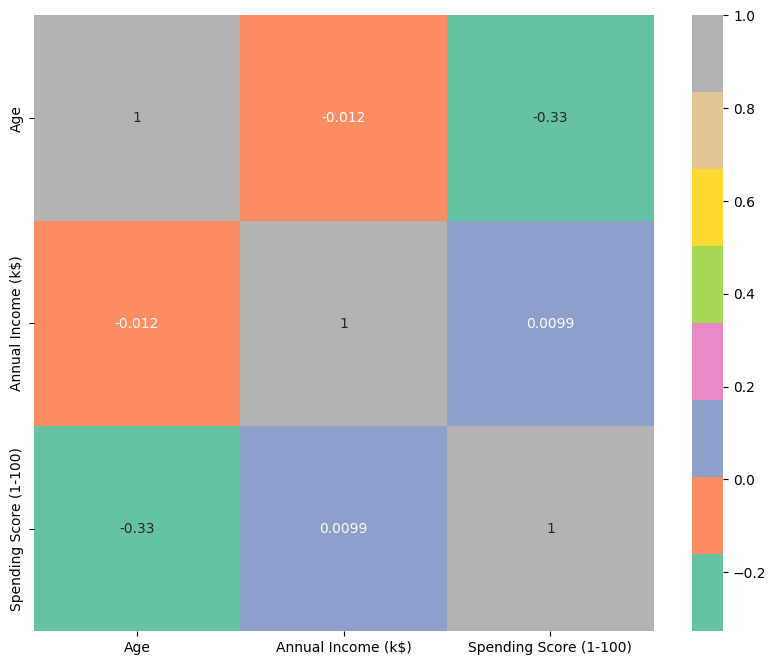

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='Set2')
plt.show()

# Clustering : Univariate,Bivariate and Multivariate:__

In [26]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [28]:
# identifying X
X = df[['Annual Income (k$)']]
X.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


In [29]:
# identifying the optimal K:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [30]:
WCSS

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3936.796825396825,
 2876.67332112332,
 2189.2563714063713,
 1743.4772727272732]

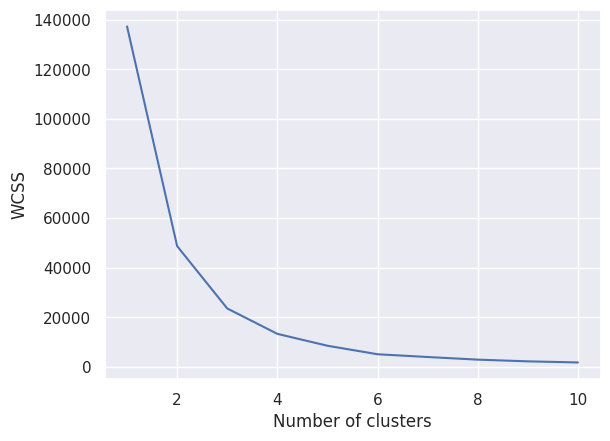

In [31]:
# plotting the elbow graph
sns.set()
plt.plot(range(1,11),WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


- Otimal Kvalue is 3

In [32]:
# Applying the Kmeans for one final time with final k-value
clustering1 = KMeans(n_clusters=3,init='k-means++')
clustering1.fit(X)

KMeans(n_clusters=3)

In [33]:
# predicting the cluster number of each data point of  'Income'
y = clustering1.predict(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [34]:
# converting y to dataframe
df['Income_cluster'] = y

In [35]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [36]:
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
195,Female,35,120,79,2
196,Female,45,126,28,2
197,Male,32,126,74,2
198,Male,32,137,18,2
199,Male,30,137,83,2


In [37]:
clustering1_group = df.groupby('Income_cluster')

In [38]:
# customers belong to group 1
group1_cx = clustering1_group.get_group(1)
group1_cx

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
69,Female,32,48,47,1
70,Male,70,49,55,1
71,Female,47,49,42,1
72,Female,60,50,49,1


In [39]:
df['Income_cluster'].value_counts()

,count
Income_cluster,
0,90
1,74
2,36


In [40]:
df.groupby('Income_cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


# Bivariate clustering:

In [41]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values


In [42]:
# identifying the optimal k

WCSS = []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [43]:
WCSS

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 31280.903845940906,
 25062.433792653766,
 21850.16528258562,
 19657.783608703947]

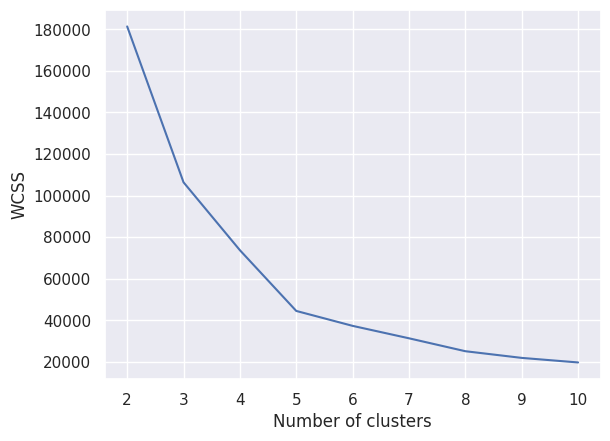

In [44]:
# plotting the elbow graph
plt.plot(range(2,11),WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

- Optimal value of k is 5

In [45]:
# Applying the kmeans for one final time with final k-value

clustering2=  KMeans(n_clusters=5,init='k-means++')
clustering2.fit(X)

KMeans(n_clusters=5)

In [46]:
Y = clustering2.predict(X) #predicting the cluster number of each datapoint
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [47]:
df['Income_&_Spending_clster'] = Y

In [48]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_&_Spending_clster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [49]:
clustering2_group = df.groupby('Income_&_Spending_clster')

In [50]:
# Cx belonging to cluster 4
clustering2_group.get_group(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_&_Spending_clster
124,Female,23,70,29,0,3
128,Male,59,71,11,0,3
130,Male,47,71,9,0,3
134,Male,20,73,5,0,3
136,Female,44,73,7,0,3
138,Male,19,74,10,0,3
140,Female,57,75,5,0,3
144,Male,25,77,12,0,3
146,Male,48,77,36,0,3
148,Female,34,78,22,0,3


In [51]:
df.groupby('Income_&_Spending_clster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_&_Spending_clster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


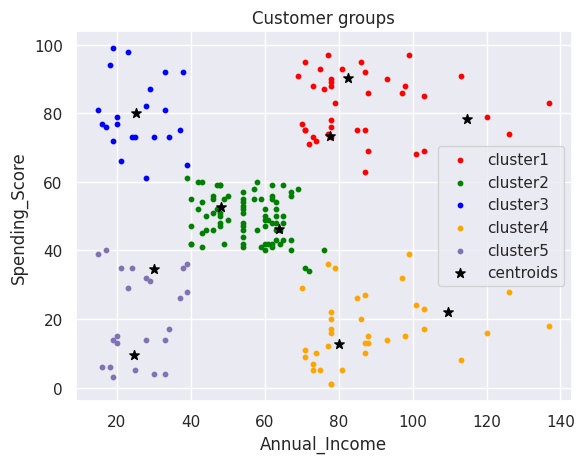

In [55]:
# plotting the clusters

plt.scatter(X[Y==0,0],X[Y==0,1],s=10,color='red',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=10,color='green',label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=10,color='blue',label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=10,color='orange',label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=10,color='m',label='cluster5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black',label='centroids',marker='*')
plt.title("Customer groups")
plt.legend()
plt.xlabel("Annual_Income")
plt.ylabel("Spending_Score")
plt.show()

# Multivariate Analysis:

In [56]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Income_&_Spending_clster'],
      dtype='object')

In [57]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_&_Spending_clster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [58]:
# convrting the Gender column data type from object to int(performing encoding):
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [59]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_&_Spending_clster
0,1,19,15,39,1,4
1,1,21,15,81,1,2
2,0,20,16,6,1,4
3,0,23,16,77,1,2
4,0,31,17,40,1,4


In [60]:
X = df.iloc[:,:]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Income_&_Spending_clster
0,1,19,15,39,1,4
1,1,21,15,81,1,2
2,0,20,16,6,1,4
3,0,23,16,77,1,2
4,0,31,17,40,1,4


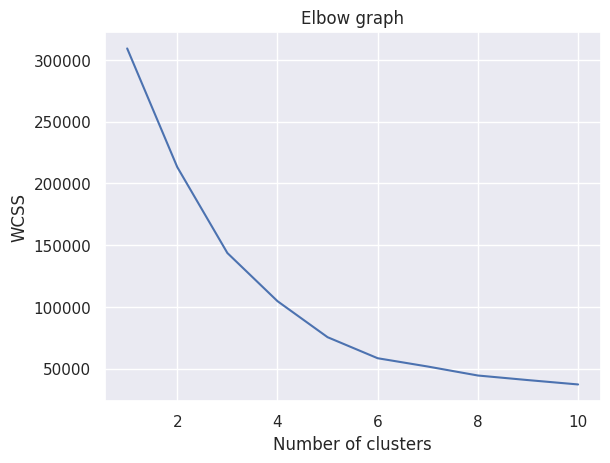

In [61]:
# identifying best k:
WCSS=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("Elbow graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [62]:
# applying the kmeans on final K-value
clustering3 = KMeans(n_clusters=6,init='k-means++')
clustering3.fit(X)

KMeans(n_clusters=6)

In [63]:
# predicting the cluster of each data point
y = clustering3.predict(X)
y

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 2, 0,
       2, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [64]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster', 'Income_&_Spending_clster'],
      dtype='object')

In [65]:
df_new = df.drop(columns=['Income_cluster','Income_&_Spending_clster'])
df_new['ClusterNumber'] = y

In [66]:
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterNumber
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2


In [67]:
# print the customer wo belongs to group 1
clustering3_group = df_new.groupby('ClusterNumber')
clustering3_group.get_group(0)

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterNumber
43,0,31,39,61,0
47,0,27,40,47,0
48,0,29,40,42,0
49,0,31,40,42,0
51,1,33,42,60,0
52,0,31,43,54,0
58,0,27,46,51,0
61,1,19,46,55,0
65,1,18,48,59,0
68,1,19,48,59,0


In [68]:
# customers belong to group 6
clustering3_group.get_group(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),ClusterNumber
40,0,65,38,35,5
46,0,50,40,55,5
50,0,49,42,52,5
53,1,59,43,60,5
54,0,50,43,45,5
55,1,47,43,41,5
56,0,51,44,50,5
57,1,69,44,46,5
59,1,53,46,46,5
60,1,70,46,56,5
